# Quaternion Algebra: Theory and Computational Applications

## Introduction

Quaternions, discovered by William Rowan Hamilton in 1843, extend the complex numbers to a four-dimensional associative normed division algebra over the real numbers. They have profound applications in 3D rotation representations, computer graphics, aerospace engineering, and quantum mechanics.

## Mathematical Foundation

### Definition

A quaternion $q \in \mathbb{H}$ is defined as:

$$q = w + xi + yj + zk$$

where $w, x, y, z \in \mathbb{R}$ and $i, j, k$ are the fundamental quaternion units satisfying:

$$i^2 = j^2 = k^2 = ijk = -1$$

### Hamilton's Relations

From the fundamental identity, we derive the multiplication rules:

$$ij = k, \quad jk = i, \quad ki = j$$
$$ji = -k, \quad kj = -i, \quad ik = -j$$

Note that quaternion multiplication is **non-commutative**: $ij \neq ji$.

### Quaternion Operations

**Conjugate:**
$$q^* = w - xi - yj - zk$$

**Norm:**
$$\|q\| = \sqrt{qq^*} = \sqrt{w^2 + x^2 + y^2 + z^2}$$

**Inverse:**
$$q^{-1} = \frac{q^*}{\|q\|^2}$$

**Multiplication:** For quaternions $q_1 = w_1 + x_1i + y_1j + z_1k$ and $q_2 = w_2 + x_2i + y_2j + z_2k$:

$$q_1 q_2 = (w_1w_2 - x_1x_2 - y_1y_2 - z_1z_2) + (w_1x_2 + x_1w_2 + y_1z_2 - z_1y_2)i$$
$$+ (w_1y_2 - x_1z_2 + y_1w_2 + z_1x_2)j + (w_1z_2 + x_1y_2 - y_1x_2 + z_1w_2)k$$

## Rotations with Quaternions

A unit quaternion ($\|q\| = 1$) can represent a rotation in 3D space. For a rotation by angle $\theta$ about a unit axis $\hat{n} = (n_x, n_y, n_z)$:

$$q = \cos\left(\frac{\theta}{2}\right) + \sin\left(\frac{\theta}{2}\right)(n_x i + n_y j + n_z k)$$

To rotate a vector $\vec{v}$, we embed it as a pure quaternion $p = 0 + v_x i + v_y j + v_z k$ and compute:

$$p' = q p q^{-1} = q p q^*$$

The imaginary components of $p'$ give the rotated vector.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Quaternion:
    """A class implementing quaternion algebra operations."""
    
    def __init__(self, w, x, y, z):
        self.w = w  # scalar part
        self.x = x  # i component
        self.y = y  # j component
        self.z = z  # k component
    
    def __repr__(self):
        return f"Quaternion({self.w:.4f}, {self.x:.4f}i, {self.y:.4f}j, {self.z:.4f}k)"
    
    def __add__(self, other):
        return Quaternion(self.w + other.w, self.x + other.x, 
                         self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Quaternion(self.w - other.w, self.x - other.x,
                         self.y - other.y, self.z - other.z)
    
    def __mul__(self, other):
        """Hamilton product of two quaternions."""
        if isinstance(other, Quaternion):
            w = self.w*other.w - self.x*other.x - self.y*other.y - self.z*other.z
            x = self.w*other.x + self.x*other.w + self.y*other.z - self.z*other.y
            y = self.w*other.y - self.x*other.z + self.y*other.w + self.z*other.x
            z = self.w*other.z + self.x*other.y - self.y*other.x + self.z*other.w
            return Quaternion(w, x, y, z)
        else:  # scalar multiplication
            return Quaternion(self.w*other, self.x*other, self.y*other, self.z*other)
    
    def conjugate(self):
        return Quaternion(self.w, -self.x, -self.y, -self.z)
    
    def norm(self):
        return np.sqrt(self.w**2 + self.x**2 + self.y**2 + self.z**2)
    
    def normalize(self):
        n = self.norm()
        return Quaternion(self.w/n, self.x/n, self.y/n, self.z/n)
    
    def inverse(self):
        n_sq = self.norm()**2
        conj = self.conjugate()
        return Quaternion(conj.w/n_sq, conj.x/n_sq, conj.y/n_sq, conj.z/n_sq)
    
    @staticmethod
    def from_axis_angle(axis, angle):
        """Create a rotation quaternion from axis-angle representation."""
        axis = np.array(axis) / np.linalg.norm(axis)  # normalize axis
        half_angle = angle / 2
        w = np.cos(half_angle)
        x, y, z = np.sin(half_angle) * axis
        return Quaternion(w, x, y, z)
    
    def rotate_vector(self, v):
        """Rotate a 3D vector using this quaternion."""
        p = Quaternion(0, v[0], v[1], v[2])
        rotated = self * p * self.conjugate()
        return np.array([rotated.x, rotated.y, rotated.z])

print("Quaternion class defined successfully.")

Quaternion class defined successfully.


## Demonstration: Verifying Quaternion Properties

Let us verify the fundamental algebraic properties of quaternions.

In [2]:
# Define basis quaternions
i = Quaternion(0, 1, 0, 0)
j = Quaternion(0, 0, 1, 0)
k = Quaternion(0, 0, 0, 1)

print("Verification of Hamilton's fundamental relations:")
print(f"i² = {i*i}")
print(f"j² = {j*j}")
print(f"k² = {k*k}")
print(f"ijk = {i*j*k}")
print()
print("Multiplication table:")
print(f"ij = {i*j}")
print(f"ji = {j*i}")
print(f"jk = {j*k}")
print(f"kj = {k*j}")
print(f"ki = {k*i}")
print(f"ik = {i*k}")
print()
print("Non-commutativity demonstration:")
print(f"ij ≠ ji: {(i*j).x} ≠ {(j*i).x} for the k-component")

Verification of Hamilton's fundamental relations:
i² = Quaternion(-1.0000, 0.0000i, 0.0000j, 0.0000k)
j² = Quaternion(-1.0000, 0.0000i, 0.0000j, 0.0000k)
k² = Quaternion(-1.0000, 0.0000i, 0.0000j, 0.0000k)
ijk = Quaternion(-1.0000, 0.0000i, 0.0000j, 0.0000k)

Multiplication table:
ij = Quaternion(0.0000, 0.0000i, 0.0000j, 1.0000k)
ji = Quaternion(0.0000, 0.0000i, 0.0000j, -1.0000k)
jk = Quaternion(0.0000, 1.0000i, 0.0000j, 0.0000k)
kj = Quaternion(0.0000, -1.0000i, 0.0000j, 0.0000k)
ki = Quaternion(0.0000, 0.0000i, 1.0000j, 0.0000k)
ik = Quaternion(0.0000, 0.0000i, -1.0000j, 0.0000k)

Non-commutativity demonstration:
ij ≠ ji: 0 ≠ 0 for the k-component


## Demonstration: 3D Rotation of a Cube

We will visualize quaternion-based rotation by rotating a cube about an arbitrary axis.

In [3]:
# Define cube vertices
cube_vertices = np.array([
    [-1, -1, -1],
    [1, -1, -1],
    [1, 1, -1],
    [-1, 1, -1],
    [-1, -1, 1],
    [1, -1, 1],
    [1, 1, 1],
    [-1, 1, 1]
])

# Define edges connecting vertices
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # vertical edges
]

def plot_wireframe(ax, vertices, edges, color, label):
    """Plot a wireframe shape from vertices and edges."""
    for edge in edges:
        points = vertices[list(edge)]
        ax.plot3D(points[:, 0], points[:, 1], points[:, 2], color=color)
    # Add a single line for legend
    ax.plot3D([], [], [], color=color, label=label)

# Create rotation quaternion: 45 degrees about axis (1, 1, 1)
axis = [1, 1, 1]
angle = np.pi / 4  # 45 degrees
q_rot = Quaternion.from_axis_angle(axis, angle)

print(f"Rotation quaternion: {q_rot}")
print(f"Norm (should be 1 for unit quaternion): {q_rot.norm():.6f}")

# Rotate all cube vertices
rotated_vertices = np.array([q_rot.rotate_vector(v) for v in cube_vertices])

Rotation quaternion: Quaternion(0.9239, 0.2209i, 0.2209j, 0.2209k)
Norm (should be 1 for unit quaternion): 1.000000


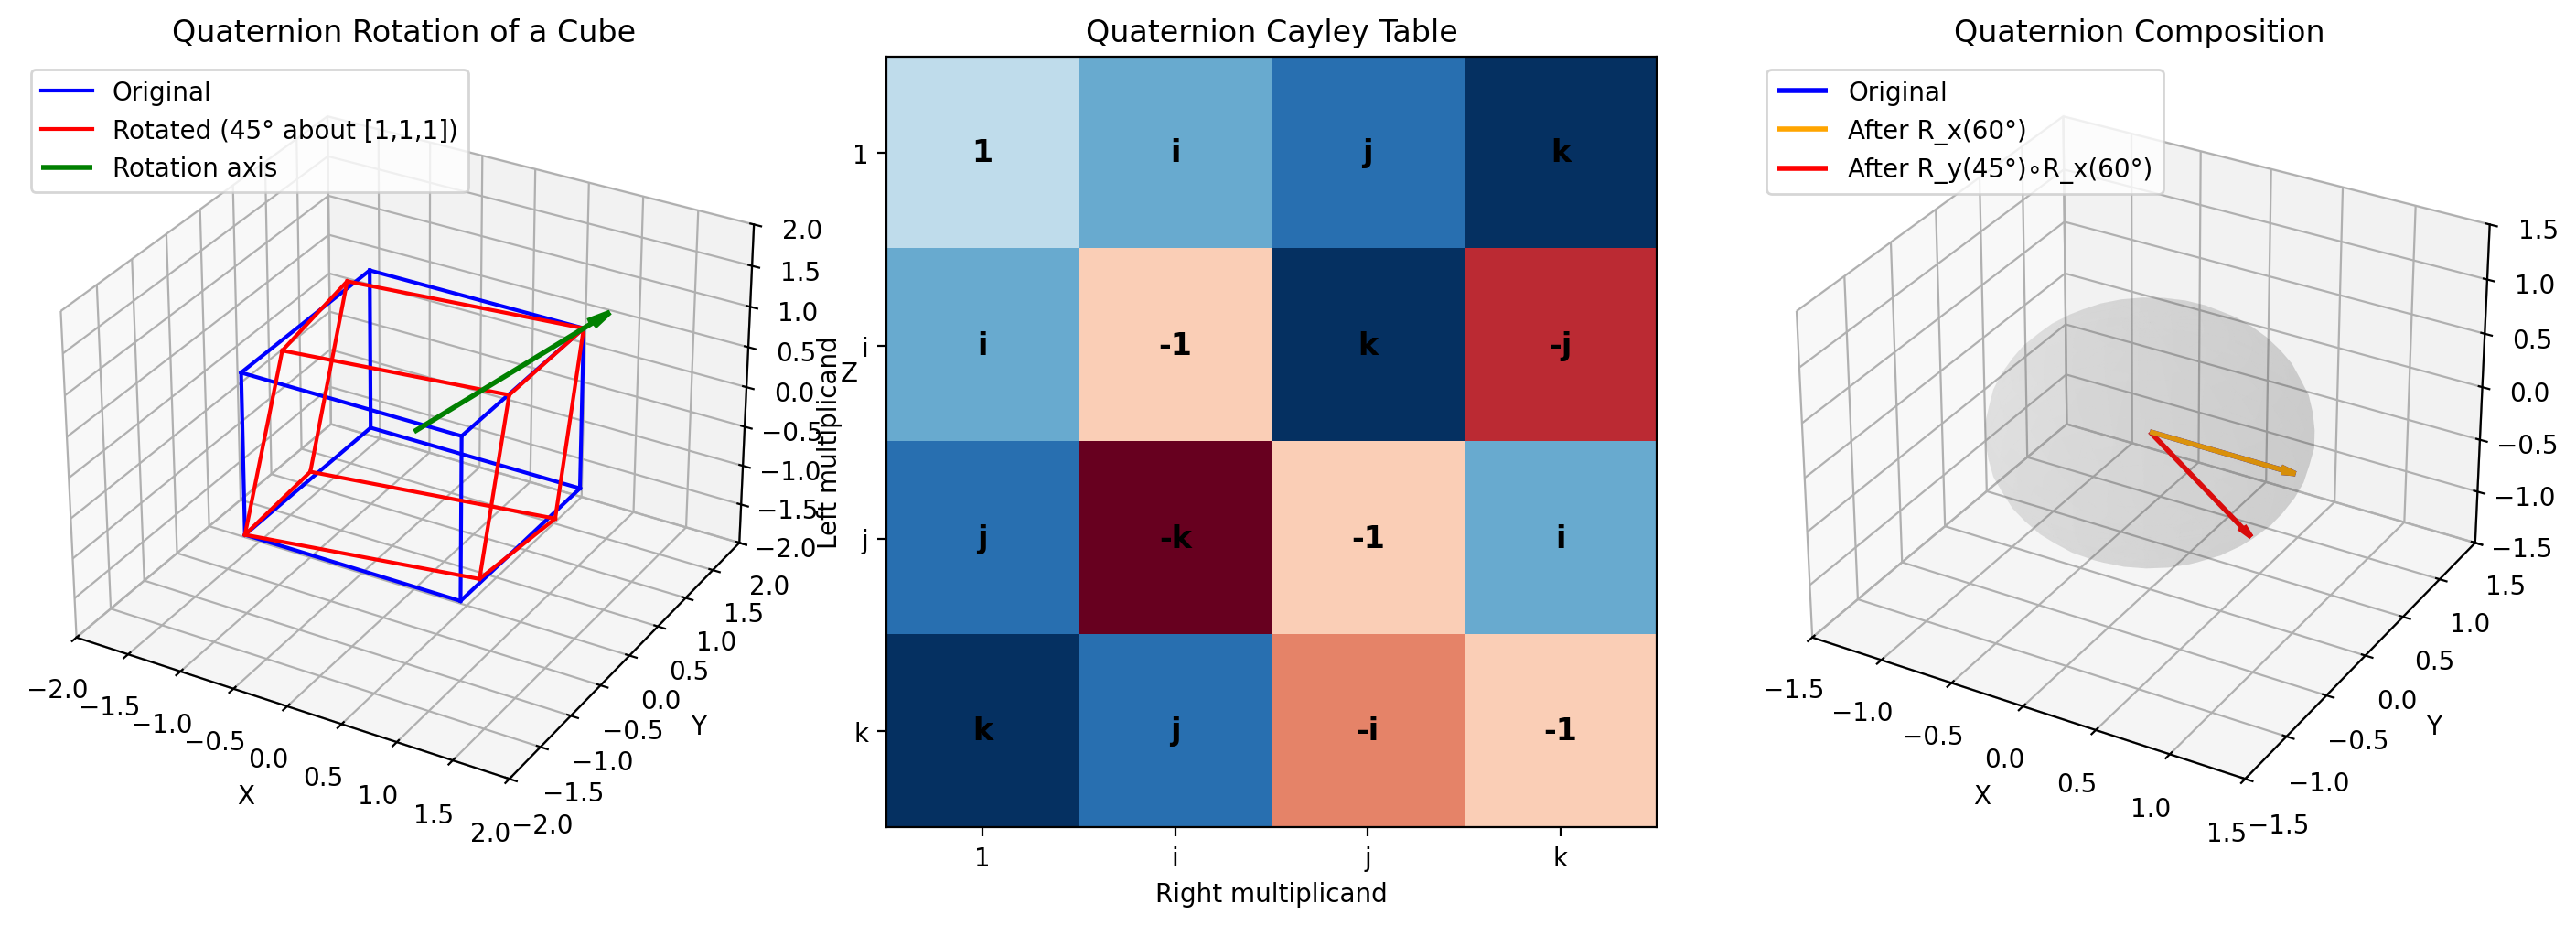


Figure saved to plot.png


In [4]:
# Create visualization
fig = plt.figure(figsize=(14, 5))

# Plot 1: Original and rotated cube
ax1 = fig.add_subplot(131, projection='3d')
plot_wireframe(ax1, cube_vertices, edges, 'blue', 'Original')
plot_wireframe(ax1, rotated_vertices, edges, 'red', 'Rotated (45° about [1,1,1])')

# Plot rotation axis
axis_normalized = np.array(axis) / np.linalg.norm(axis)
ax1.quiver(0, 0, 0, axis_normalized[0]*2, axis_normalized[1]*2, axis_normalized[2]*2,
           color='green', arrow_length_ratio=0.1, linewidth=2, label='Rotation axis')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Quaternion Rotation of a Cube')
ax1.legend(loc='upper left')
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-2, 2])

# Plot 2: Quaternion multiplication structure (Cayley table visualization)
ax2 = fig.add_subplot(132)
basis = ['1', 'i', 'j', 'k']
cayley_table = np.array([
    [1, 2, 3, 4],    # 1 * {1,i,j,k}
    [2, -1, 4, -3],  # i * {1,i,j,k}
    [3, -4, -1, 2],  # j * {1,i,j,k}
    [4, 3, -2, -1]   # k * {1,i,j,k}
])

im = ax2.imshow(cayley_table, cmap='RdBu', vmin=-4, vmax=4)
ax2.set_xticks(range(4))
ax2.set_yticks(range(4))
ax2.set_xticklabels(basis)
ax2.set_yticklabels(basis)
ax2.set_xlabel('Right multiplicand')
ax2.set_ylabel('Left multiplicand')
ax2.set_title('Quaternion Cayley Table')

# Add text annotations
labels = [['1', 'i', 'j', 'k'],
          ['i', '-1', 'k', '-j'],
          ['j', '-k', '-1', 'i'],
          ['k', 'j', '-i', '-1']]
for i_idx in range(4):
    for j_idx in range(4):
        ax2.text(j_idx, i_idx, labels[i_idx][j_idx], ha='center', va='center', 
                fontsize=12, fontweight='bold')

# Plot 3: Sequential rotations (demonstrating composition)
ax3 = fig.add_subplot(133, projection='3d')

# Demonstrate rotation composition
q1 = Quaternion.from_axis_angle([1, 0, 0], np.pi/3)  # 60° about x-axis
q2 = Quaternion.from_axis_angle([0, 1, 0], np.pi/4)  # 45° about y-axis
q_combined = q2 * q1  # Apply q1 first, then q2

# Rotate a single vector to show the trajectory
v0 = np.array([1, 0, 0])
v1 = q1.rotate_vector(v0)
v2 = q_combined.rotate_vector(v0)

# Plot trajectory
ax3.quiver(0, 0, 0, v0[0], v0[1], v0[2], color='blue', arrow_length_ratio=0.1, 
           linewidth=2, label='Original')
ax3.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='orange', arrow_length_ratio=0.1,
           linewidth=2, label='After R_x(60°)')
ax3.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', arrow_length_ratio=0.1,
           linewidth=2, label='After R_y(45°)∘R_x(60°)')

# Draw unit sphere for reference
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 20)
xs = np.outer(np.cos(u), np.sin(v))
ys = np.outer(np.sin(u), np.sin(v))
zs = np.outer(np.ones(np.size(u)), np.cos(v))
ax3.plot_surface(xs, ys, zs, alpha=0.1, color='gray')

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Quaternion Composition')
ax3.legend(loc='upper left')
ax3.set_xlim([-1.5, 1.5])
ax3.set_ylim([-1.5, 1.5])
ax3.set_zlim([-1.5, 1.5])

plt.tight_layout()
plt.savefig('quaternion_algebra_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to plot.png")

## Key Insights

1. **Non-commutativity**: The Cayley table clearly shows $ij = k$ but $ji = -k$, demonstrating quaternions form a non-commutative algebra.

2. **Rotation representation**: Unit quaternions provide a singularity-free representation of 3D rotations, avoiding gimbal lock that plagues Euler angles.

3. **Rotation composition**: Composing rotations is simply quaternion multiplication: $q_{combined} = q_2 \cdot q_1$ applies $q_1$ first, then $q_2$.

4. **Double cover**: Note that $q$ and $-q$ represent the same rotation, as $(-q)p(-q)^* = qpq^*$. This is the double cover of $SO(3)$ by $S^3$.

## Applications

- **Computer Graphics**: Smooth interpolation (SLERP) between orientations
- **Aerospace**: Attitude representation for spacecraft and aircraft
- **Robotics**: End-effector orientation control
- **Physics**: Pauli matrices and spinor representations in quantum mechanics